In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sqlalchemy import create_engine

## 1.) "E" = Extracting
- loading data into dataframes

In [2]:
beneficiary_data = pd.read_csv("Resources\Test_Beneficiarydata-1542969243754.csv")
inpatient_data = pd.read_csv("Resources\Test_Inpatientdata-1542969243754.csv")
outpatient_data = pd.read_csv("Resources\Test_Outpatientdata-1542969243754.csv")
test_data = pd.read_csv("Resources\Test-1542969243754.csv")
train_beneficiary = pd.read_csv("Resources\Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("Resources\Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("Resources\Train_Outpatientdata-1542865627584.csv")
train_data = pd.read_csv("Resources\Train-1542865627584.csv")

dict = {
    "test_beneficiary-data" : beneficiary_data,
    "test_inpatient-data" : inpatient_data,
    "test_outpatient-data" : outpatient_data,
    "test_data" : test_data,
    "train_beneficiary-data" : beneficiary_data,
    "train_inpatient-data" : train_inpatient,
    "train_outpatient-data" : train_outpatient,
    "train_data" : train_data
}

In [3]:
train_inpatient = train_inpatient[['Provider','InscClaimAmtReimbursed',"ClmDiagnosisCode_1","ClmProcedureCode_1"]]
train_inpatient.rename(columns = {
    "Provider" : "provider",
    "InscClaimAmtReimbursed" : "insurance_claim",
    "ClmDiagnosisCode_1" : "diagnosis_code",
    "ClmProcedureCode_1" : "procedure_code"
}, inplace=True)
train_inpatient.head(100).to_html(buf="inpatient.html",table_id="inpatient")

In [4]:
train_outpatient = train_outpatient[['Provider','InscClaimAmtReimbursed',"ClmDiagnosisCode_1","ClmProcedureCode_1"]]
train_outpatient.rename(columns = {
    "Provider" : "provider",
    "InscClaimAmtReimbursed" : "insurance_claim",
    "ClmDiagnosisCode_1" : "diagnosis_code",
    "ClmProcedureCode_1" : "procedure_code"
}, inplace=True)
train_outpatient.head(100).to_html(buf="outpatient.html",table_id="outpatient")

In [5]:
train_data.rename(columns={
    "Provider" : "provider",
    "PotentialFraud" : "potential_fraud"
},inplace=True)

In [9]:
train_data.head(100).to_html(buf="potential_fraud.html",table_id="potential_fraud")

In [14]:
beneficiary_data.keys()

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [7]:
beneficiary_data = beneficiary_data[["BeneID","State","County"]]
beneficiary_data.rename(columns={
    "BeneID" : "beneficiary",
    "State" : "state",
    "County" : "county"
}, inplace=True)

In [8]:
beneficiary_data.head(100).to_html(buf="beneficiary.html",table_id="beneficiary")

In [6]:

#train_outpatient.head(10).to_html(buf="outpatient.html",table_id="outpatient")

### Entity-relationship-diagram (ETL)
- used to get text for creating Entity-relationship-diagram (ETL)
    - [quickdatabasediagrams](https://www.quickdatabasediagrams.com/)

In [18]:
# for key in dict.keys():
#     print(key)
#     print("-")
#     [print(x) for x in list(dict[key].keys())] 
#     print("")

## 2.) "T" - Transforming
---

In [3]:
in_out_data = train_inpatient.append(train_outpatient)
df = pd.merge(in_out_data,train_data)
df

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1        BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
2        BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
3        BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   
4        BENE24402   CLM32911   2009-01-08  2009-01-12  PRV55912   
...            ...        ...          ...         ...       ...   
558206  BENE154687  CLM184358   2009-02-08  2009-02-08  PRV54302   
558207  BENE157252  CLM603185   2009-09-28  2009-09-28  PRV57762   
558208  BENE157378  CLM460770   2009-07-09  2009-07-29  PRV51577   
558209  BENE158295  CLM306999   2009-04-16  2009-04-16  PRV53083   
558210  BENE158736  CLM589654   2009-09-20  2009-09-20  PRV56377   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                        26000          PHY390922                NaN   
1                        19000          PHY349293          PHY370861   
2                        17000          PHY334706          PHY334706   
3                        13000          PHY390614          PHY323689   
4                         3000          PHY380413          PHY432598   
...                        ...                ...                ...   
558206                    3300          PHY376238          PHY376238   
558207                    1900          PHY432730                NaN   
558208                    2100          PHY338096                NaN   
558209                      10          PHY416646                NaN   
558210                      60          PHY392440                NaN   

       OtherPhysician AdmissionDt  ... ClmDiagnosisCode_8  ClmDiagnosisCode_9  \
0                 NaN  2009-04-12  ...              19889                5849   
1           PHY363291  2009-01-20  ...               2753               E9305   
2                 NaN  2009-10-17  ...              43812                4019   
3           PHY363291  2009-10-25  ...                NaN                 NaN   
4                 NaN  2009-01-08  ...                NaN                 NaN   
...               ...         ...  ...                ...                 ...   
558206            NaN         NaN  ...                NaN                 NaN   
558207            NaN         NaN  ...                NaN                 NaN   
558208            NaN         NaN  ...                NaN                 NaN   
558209            NaN         NaN  ...                NaN                 NaN   
558210      PHY392440         NaN  ...                NaN                 NaN   

       ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                      NaN                NaN                NaN   
1                      NaN             7769.0             5849.0   
2                      NaN             9338.0                NaN   
3                      NaN             8154.0                NaN   
4                      NaN             8543.0                NaN   
...                    ...                ...                ...   
558206                 NaN                NaN                NaN   
558207                 NaN                NaN                NaN   
558208                 NaN                NaN                NaN   
558209                 NaN                NaN                NaN   
558210                 NaN                NaN                NaN   

       ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
558206                NaN                NaN                NaN   
5582

## Extracting only relevant columns / fields from data
---

In [13]:
#df = df[['Provider','InscClaimAmtReimbursed',"ClmDiagnosisCode_1","ClmProcedureCode_1","PotentialFraud"]]

### Renaming columns / fields to more readable names

In [10]:
df.rename(columns = {
    "Provider" : "provider",
    "InscClaimAmtReimbursed" : "insurance_claim",
    "ClmDiagnosisCode_1" : "diagnosis_code",
    "ClmProcedureCode_1" : "procedure_code",
    "PotentialFraud" : "potential_fraud"
}, inplace=True)
df

provider  insurance_claim diagnosis_code  procedure_code  \
0       PRV55912            26000           1970             NaN   
1       PRV55912            19000           4240          7769.0   
2       PRV55912            17000          V5789          9338.0   
3       PRV55912            13000          71535          8154.0   
4       PRV55912             3000           2330          8543.0   
...          ...              ...            ...             ...   
558206  PRV54302             3300          99661             NaN   
558207  PRV57762             1900           2330             NaN   
558208  PRV51577             2100           5854             NaN   
558209  PRV53083               10          42789             NaN   
558210  PRV56377               60          V5861             NaN   

       potential_fraud  
0                  Yes  
1                  Yes  
2                  Yes  
3                  Yes  
4                  Yes  
...                ...  
558206              No  
558207              No  
558208              No  
558209              No  
558210              No  

[558211 rows x 5 columns]

## 3.) "L" - Loading data into database
---

In [7]:
engine = create_engine("sqlite:///db.sqlite")

In [11]:
df.to_sql(name = 'table',
          con = engine,
          if_exists = 'replace',
          index = False
         )

---
EXTRA
## Visualization of Data
---

In [14]:
filt = df.PotentialFraud == "Yes"
df_yes = df[filt]
filt = df.PotentialFraud == "No"
df_no = df[filt]
#df_yes

AttributeError: 'DataFrame' object has no attribute 'PotentialFraud'

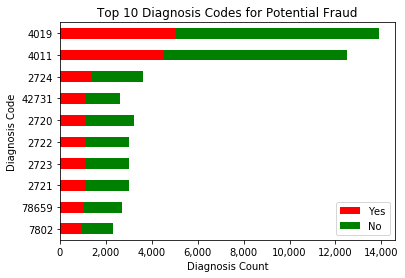

<Figure size 432x288 with 0 Axes>

In [6]:
# Diagnosis
diag_yes = df_yes.groupby(by="ClmDiagnosisCode_1").count().rename(columns={'Provider':'Diagnosis Count'})['Diagnosis Count'].sort_values(ascending=False)
diag_no = df_no.groupby(by="ClmDiagnosisCode_1").count().rename(columns={'Provider':'Diagnosis Count'})['Diagnosis Count'].sort_values(ascending=False)

diag = pd.DataFrame({
    'Yes' : diag_yes,
    'No' : diag_no
})

ax = diag.sort_values(by='Yes',ascending=False).head(10).plot.barh(stacked=True, color=['red','green'])

ax.invert_yaxis()
plt.ylabel("Diagnosis Code")
plt.xlabel("Diagnosis Count")
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Top 10 Diagnosis Codes for Potential Fraud")
plt.savefig('output/top-10-diagnoses.png')
plt.show()


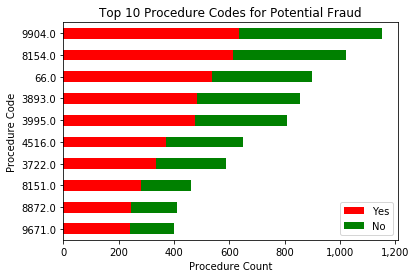

<Figure size 432x288 with 0 Axes>

In [7]:
# Procedure
proc_yes = df_yes.groupby(by="ClmProcedureCode_1").count().rename(columns={'Provider':'Procedure Count'})['Procedure Count'].sort_values(ascending=False)
proc_no = df_no.groupby(by="ClmProcedureCode_1").count().rename(columns={'Provider':'Procedure Count'})['Procedure Count'].sort_values(ascending=False)

proc = pd.DataFrame({
    'Yes' : proc_yes,
    'No' : proc_no
})

ax = proc.sort_values(by='Yes',ascending=False).head(10).plot.barh(stacked=True, color=['red','green'])

ax.invert_yaxis()
plt.ylabel("Procedure Code")
plt.xlabel("Procedure Count")
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Top 10 Procedure Codes for Potential Fraud")
plt.savefig('output/top-10-procedures.png')
plt.show()
